In [4]:
# Importing Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from PIL import Image
warnings.filterwarnings('ignore')

In [5]:
# Importing the pandas library to use its functionalities
import pandas as pd

anime = pd.read_csv(r"/content/anime.csv")
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
print('Number of Unique anime are {}'.format(len(anime['anime_id'].unique())))

Number of Unique anime are 12294


In [7]:
print('Number of Unique movie name are {}'.format(len(anime['name'].unique())))

Number of Unique movie name are 12292


In [8]:
anime['rating'].value_counts()

,count
rating,
6.00,141
7.00,99
6.50,90
6.25,84
5.00,76
...,...
3.47,1
3.71,1
3.87,1


In [9]:
anime['anime_id'].unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081])

In [10]:
anime.info


<bound method DataFrame.info of        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]>

In [11]:
anime.rating.describe()

,rating
count,12064.000000
mean,6.473902
std,1.026746
min,1.670000
25%,5.880000
50%,6.570000
75%,7.180000
max,10.000000


In [12]:
anime.describe()


,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [13]:
anime.isnull().any()

,0
anime_id,False
name,False
genre,True
type,True
episodes,False
rating,True
members,False


In [14]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [15]:
anime.duplicated().sum()

0

In [16]:
anime[anime.duplicated()].shape

(0, 7)

In [17]:

anime[anime.duplicated()]

,anime_id,name,genre,type,episodes,rating,members


In [18]:
anime['rating']=anime['rating'].fillna(anime['rating'].mode()[0])
anime['genre']=anime['genre'].fillna(anime['genre'].mode()[0])
anime['type']=anime['type'].fillna(anime['type'].mode()[0])

In [19]:
anime.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [20]:
anime.groupby('name')['rating'].mean().sort_values(ascending=False).head()

,rating
name,
Taka no Tsume 8: Yoshida-kun no X-Files,10.00
Spoon-hime no Swing Kitchen,9.60
Mogura no Motoro,9.50
Kimi no Na wa.,9.37
Kahei no Umi,9.33


In [21]:
anime.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

,rating
name,
Shi Wan Ge Leng Xiaohua,2
Saru Kani Gassen,2
&quot;0&quot;,1
Otoshidama,1
Otome Nadeshiko Koi Techou,1
Otome Youkai Zakuro,1
Otome Youkai Zakuro Picture Drama,1
Otome wa Boku ni Koishiteru,1
Otome wa Boku ni Koishiteru Special,1


In [22]:
ratings = pd.DataFrame(anime.groupby('name')['rating'].mean())
ratings.head()

,rating
name,
&quot;0&quot;,5.06
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06
&quot;Bungaku Shoujo&quot; Memoire,7.54
&quot;Bungaku Shoujo&quot; Movie,7.63


In [23]:
ratings['num of ratings'] = pd.DataFrame(anime.groupby('name')['rating'].count())
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,5.06,1
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",5.00,1
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,7.06,1
&quot;Bungaku Shoujo&quot; Memoire,7.54,1
&quot;Bungaku Shoujo&quot; Movie,7.63,1



### Data Visualization

<Axes: >

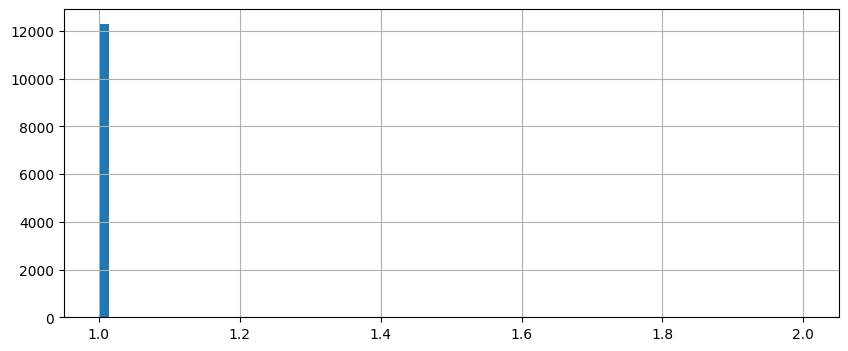

In [24]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<Axes: >

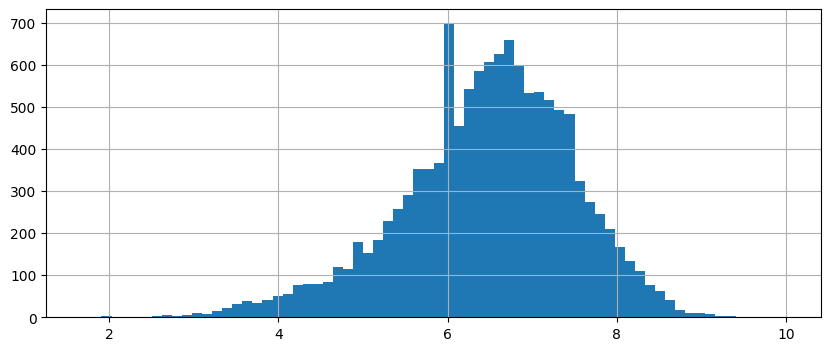

In [25]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

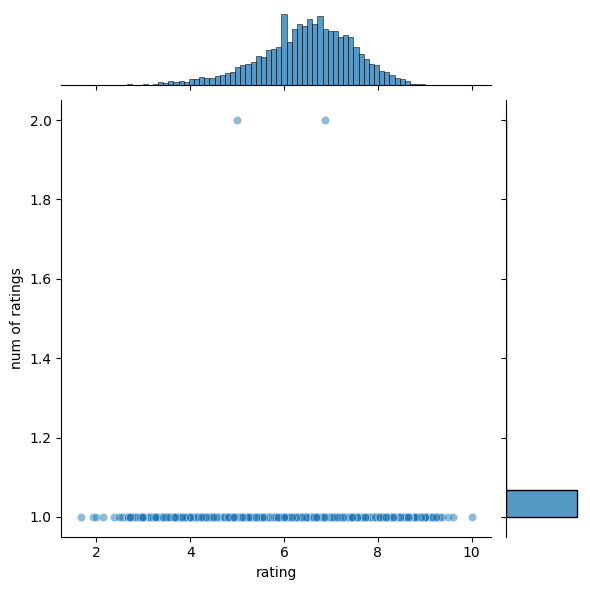

In [26]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

Text(0.5, 1.0, 'Ratings Frequency')

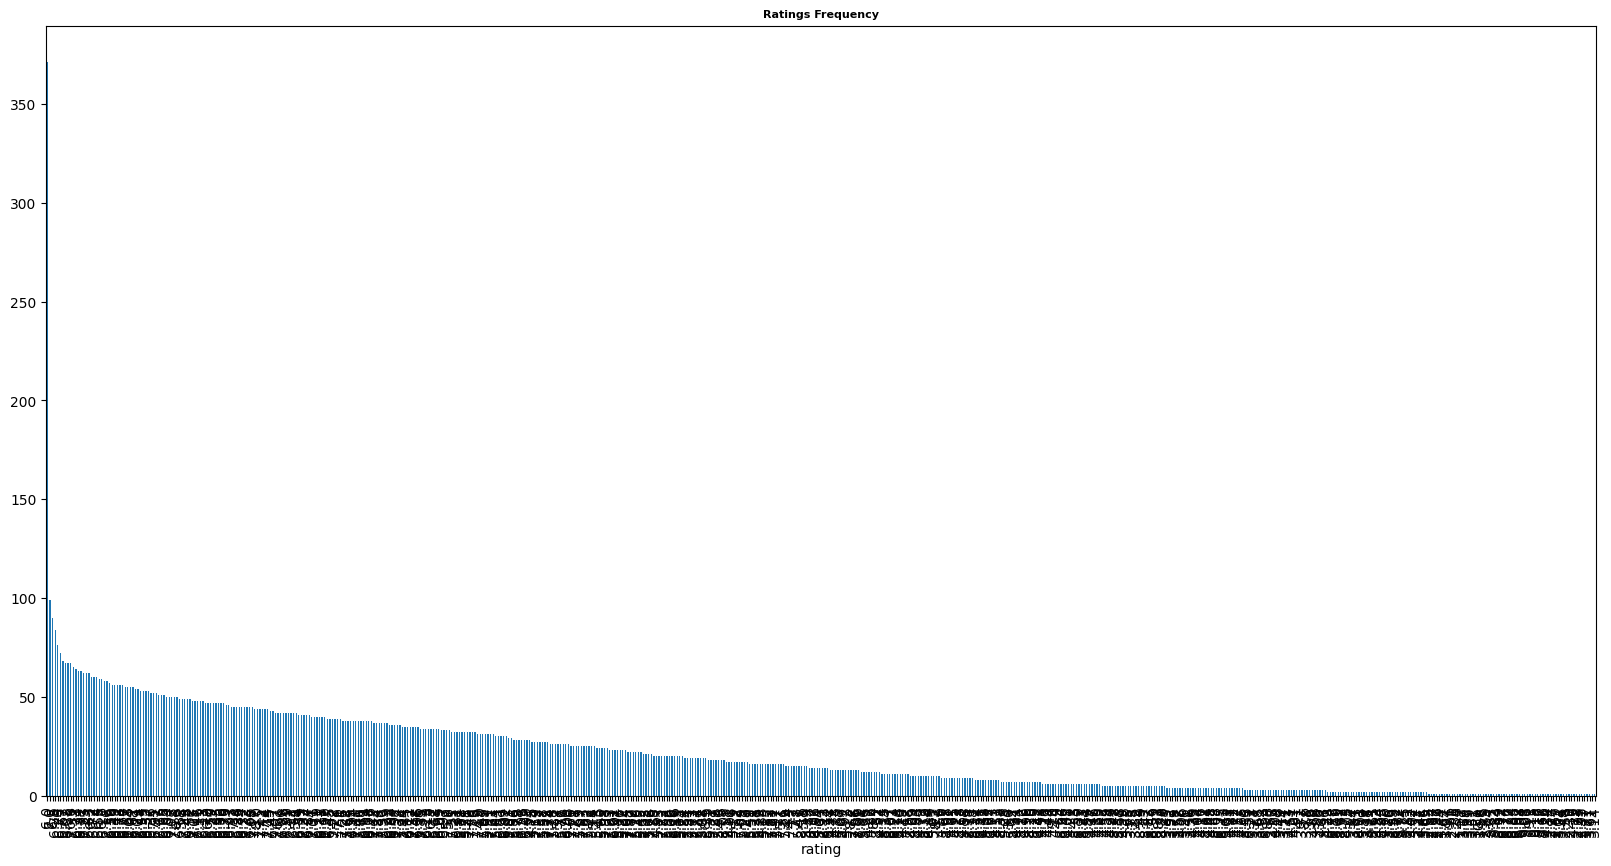

In [27]:
plt.figure(figsize=(20,10))
anime['rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 8, fontweight = 'bold')

In [28]:

top_anime = anime[['rating','name']].value_counts().head(10)
top_anime.index

MultiIndex([(1.67,                   'Platonic Chain: Ansatsu Jikkouchuu'),
            (6.83, 'Nagato Yuki-chan no Shoushitsu: Owarenai Natsuyasumi'),
            (6.94,                 'Qin Shiming Yue Zhi: Bai Bu Fei Jian'),
            (6.94,                                'Recorder to Randoseru'),
            (6.94,          'Ryou Seibai!: Gakuen Bishoujo Seisai Hiroku'),
            (6.94,     'Shippuu! Iron Leaguer: Silver no Hata no Moto ni'),
            (6.94,               'Shoujo x Shoujo x Shoujo The Animation'),
            (6.94,                 'Shoujo-tachi no Sadism The Animation'),
            (6.94,                              'Suteki Tantei Labyrinth'),
            (6.94,                                         'Tonde Mon Pe')],
           names=['rating', 'name'])

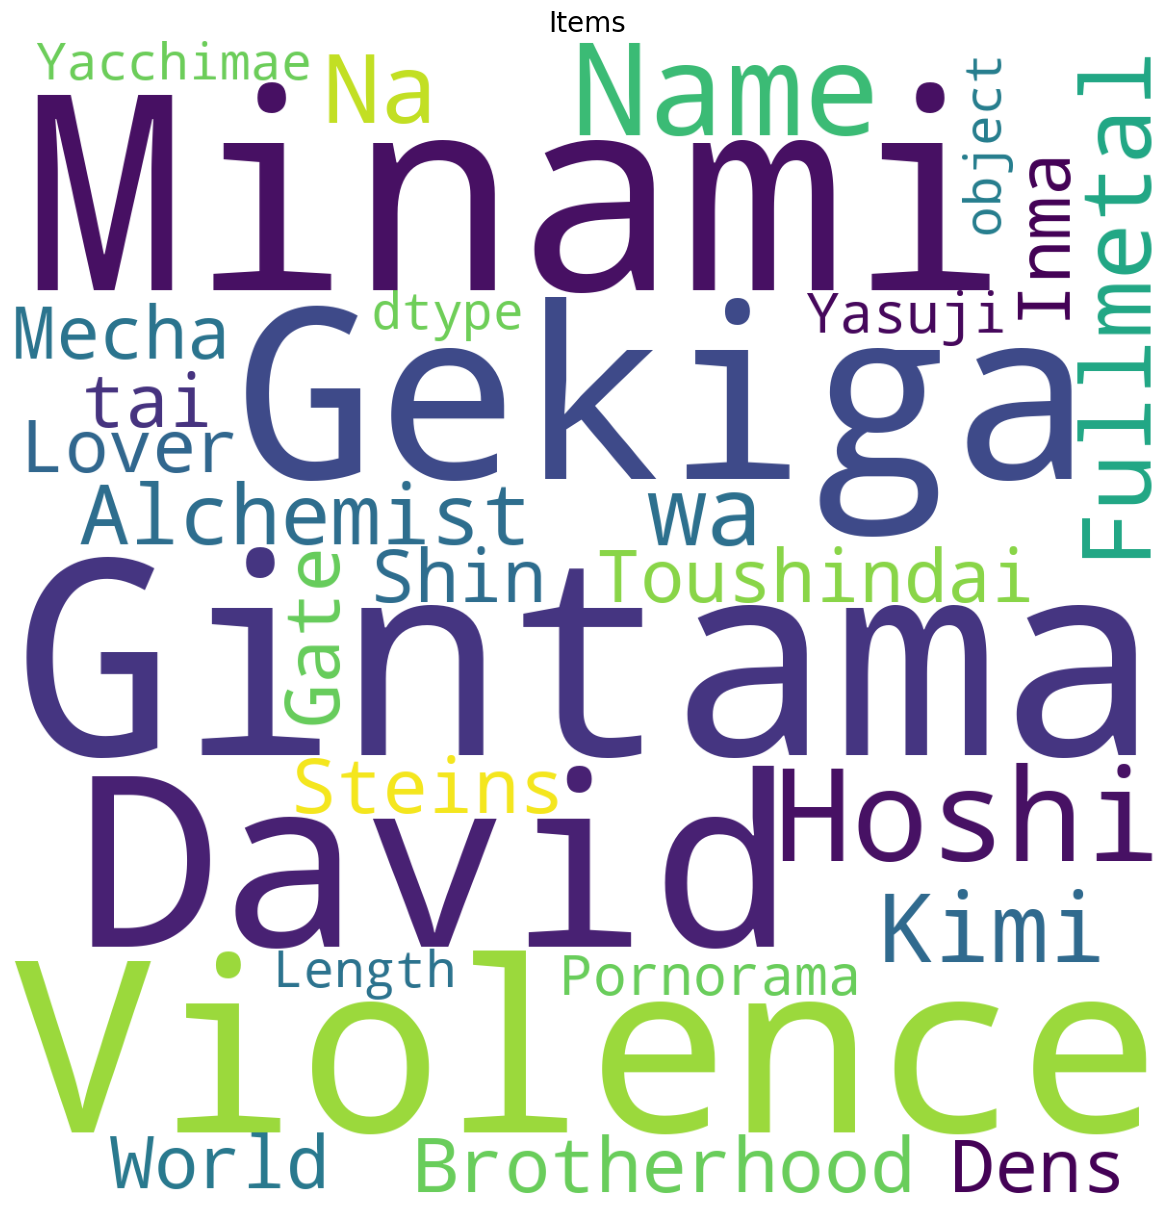

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(anime.name))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()

###  Creating Pivot Table

In [30]:
user_anime_df = anime.pivot_table(index='anime_id',columns = 'name', values = 'rating').fillna(0)
user_anime_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [32]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
name,,
Shi Wan Ge Leng Xiaohua,6.87,2
Saru Kani Gassen,4.99,2
&quot;0&quot;,5.06,1
Otoshidama,4.00,1
Otome Nadeshiko Koi Techou,6.04,1
Otome Youkai Zakuro,7.60,1
Otome Youkai Zakuro Picture Drama,6.45,1
Otome wa Boku ni Koishiteru,7.18,1
Otome wa Boku ni Koishiteru Special,6.76,1


### Shi Wan Ge Leng Xiaohua  vs  Otoshidama

In [33]:
shi_user_ratings = user_anime_df['Shi Wan Ge Leng Xiaohua']
oto_user_rating = user_anime_df['Otoshidama']
oto_user_rating.head()

,Otoshidama
anime_id,
1,0.0
5,0.0
6,0.0
7,0.0
8,0.0


In [34]:
similar_to_oto = user_anime_df.corrwith(oto_user_rating)
similar_to_shi = user_anime_df.corrwith(shi_user_ratings)

In [35]:

corr_oto = pd.DataFrame(similar_to_oto,columns=['Correlation'])
corr_oto.dropna(inplace=True)
corr_oto.head()

,Correlation
name,
&quot;0&quot;,-0.000081
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",-0.000081
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,-0.000081
&quot;Bungaku Shoujo&quot; Memoire,-0.000081
&quot;Bungaku Shoujo&quot; Movie,-0.000081


In [36]:
corr_oto.sort_values('Correlation',ascending=False).head(10)

,Correlation
name,
Otoshidama,1.000000
Planetarium Uchuu Kyoudai: Itten no Hikari,-0.000081
Kaibutsu-kun (1980),-0.000081
Morita-san wa Mukuchi,-0.000081
Joshikousei: Girl&#039;s High,-0.000081
Hellsing: Psalm of Darkness,-0.000081
Beast Wars Neo,-0.000081
Dog Days&#039;&#039;,-0.000081
Hashire! Shiroi Ookami,-0.000081


In [37]:
corr_oto = corr_oto.join(ratings['rating'])
corr_oto.head()

,Correlation,rating
name,,
&quot;0&quot;,-0.000081,5.06
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",-0.000081,5.00
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,-0.000081,7.06
&quot;Bungaku Shoujo&quot; Memoire,-0.000081,7.54
&quot;Bungaku Shoujo&quot; Movie,-0.000081,7.63


In [38]:
corr_oto[corr_oto['rating']>5].sort_values('Correlation',ascending=False).head()

,Correlation,rating
name,,
Planetarium Uchuu Kyoudai: Itten no Hikari,-0.000081,6.79
Kaibutsu-kun (1980),-0.000081,6.79
Hellsing: Psalm of Darkness,-0.000081,7.16
Beast Wars Neo,-0.000081,6.69
Joshikousei: Girl&#039;s High,-0.000081,6.69


In [39]:
corr_shi = pd.DataFrame(similar_to_shi,columns=['Correlation'])
corr_shi.dropna(inplace=True)
corr_shi = corr_shi.join(ratings['num of ratings'])
corr_shi[corr_shi['num of ratings']>4].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
name,,


In [40]:
user_anime_df.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cosine Similarity between Users

In [41]:

# Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, jaccard

In [42]:
user_sim = 1 - pairwise_distances(user_anime_df.values, metric = 'cosine')
user_sim[user_sim < 0.5] = 0
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [43]:
# Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,12284,12285,12286,12287,12288,12289,12290,12291,12292,12293
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [45]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5,0:5]

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [46]:

# Set the index and column name to user Ids
user_sim_df.index = list(user_anime_df.index)
user_sim_df.columns = list(user_anime_df.index)
user_sim_df

,1,5,6,7,8,15,16,17,18,19,...,34498,34501,34502,34503,34506,34514,34519,34522,34525,34527
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
user_id_eight = user_sim_df.sort_values([], ascending=False).head(100)
user_id_eight

,1,5,6,7,8,15,16,17,18,19,...,34498,34501,34502,34503,34506,34514,34519,34522,34525,34527
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
anime[(anime['anime_id']==8) | (anime['anime_id']==14)]

,anime_id,name,genre,type,episodes,rating,members
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


In [49]:
user_sim_df.idxmax(axis=1)

,0
1,1
5,1
6,1
7,1
8,1
...,...
34514,1
34519,1
34522,1
34525,1


In [50]:
# Vectorize 'genre' for similarity computation
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_matrix = vectorizer.fit_transform(anime['genre'])

# Normalize ratings if necessary
#anime['rating'] = anime['rating'] / anime['rating'].max()

In [51]:
def give_reco(anime_id):
    tem = list(user_sim_df.sort_values([anime_id],ascending=False).head(100).index)
    #print('similar customer ids:',tem)
    movie_list=[]
    for i in tem:
        movie_list=movie_list+list(anime[anime['anime_id']==i]['name'])
    #print('Common movies within customer',movie_list)
    return set(movie_list)-set(anime[anime['anime_id']==anime_id]['name'])

In [52]:
re=give_reco(32281)
re

{'Anata ga Furikaeru Toki',
 'Ashita no Joe Pilots',
 'Barbapapa (1977)',
 'Battle Spirits: Sword Eyes Gekitouden',
 'Bokura Mangaka: Tokiwasou Monogatari',
 'Cowboy Bebop',
 'D-Frag!',
 'Dai-chan, Daisuki.',
 'Donkikko',
 'Dotanba no Manners',
 'Doteraman',
 'Doubutsu Mura Monogatari',
 'Ecchan no Sensou',
 'Eikou e no Spur: Igaya Chiharu Monogatari',
 'Fight Da!! Pyuta',
 'Fujiko F. Fujio: Sukoshi Fushigi Tanpen Theater',
 'Furiten-kun',
 'Furiten-kun (1990)',
 'Gaist Crusher',
 'Gekisou! Rubenkaiser',
 'Genshiken Nidaime Specials',
 'Giga Tribe',
 'Green Saver',
 'Hana no Hi',
 'Heisei Tensai Bakabon',
 'Hi Gekiga Ukiyoe Senya Ichiya',
 'Huckleberry no Bouken (Movie)',
 'Hunter x Hunter Movie: The Last Mission',
 'IS: Infinite Stratos 2 - Hitonatsu no Omoide',
 'Ijiwaru Baasan',
 'Ijiwaru Baasan (1996)',
 'Ikinari Dagon',
 'Ikkyuu-san (1978)',
 'Itazura Tenshi Chippo-chan',
 'KY Kei JC Kuukichan',
 'Kagachi-sama Onagusame Tatematsurimasu: Netorare Mura Inya Hanashi The Animation',
 

#### Different Threshold values

In [53]:
# List of threshold values to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Function to get recommendations based on a given threshold
def get_recommendations(anime_id, threshold):
    idx = anime[anime['anime_id'] == anime].index[0]
    cosine_sim = cosine_similarity(genre_matrix)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = [i for i in sim_scores if i[1] >= threshold and i[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    anime_indices = [i[0] for i in sim_scores]
    return anime.iloc[anime_indices][['anime_id', 'name', 'genre', 'rating']]



In [55]:
def get_recommendations(anime_id, threshold):
    # Corrected line: Compare 'anime_id' column to the specific anime_id value
    idx = anime[anime['anime_id'] == anime_id].index[0]
    cosine_sim = cosine_similarity(genre_matrix)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = [i for i in sim_scores if i[1] >= threshold and i[0] != idx]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    anime_indices = [i[0] for i in sim_scores]
    return anime.iloc[anime_indices][['anime_id', 'name', 'genre', 'rating']]

#### Threshold = 0.1:

The list is quite extensive with over 4,000 entries.
Recommendations include a diverse range of genres and anime IDs, showing many options with a broad range of similarity scores.

#### Threshold = 0.2:

The list narrows slightly to about 4,200 entries.
Still covers a wide array of genres but begins to focus more on the higher similarity scores.

#### Threshold = 0.3:

The list reduces further to around 1,925 entries.
Recommendations are more focused, with higher similarity scores and more specific genres.

#### Threshold = 0.4:

The list continues to shrink to approximately 1,218 entries.
Recommendations are more refined, focusing on higher similarity matches.

#### Threshold = 0.5:

The list reduces to 829 entries.
The recommendations are more concentrated, with more specific anime and higher similarity ratings.

#### Threshold = 0.6:

The list is further reduced to 210 entries.
Recommendations are quite specific, with high similarity and more focused genres.

#### Threshold = 0.7:

The list has 119 entries.
This list is highly focused, with very similar recommendations based on high thresholds.
#### Threshold = 0.8:

The list includes 36 entries.
Recommendations are very precise with high similarity and targeted genres.

#### Threshold = 0.9:

The list is very concise with only 2 entries.
The recommendations are highly specific, offering very close matches to the input preferences.

### Interview Questions:
#####  1 User-based vs. Item-based Collaborative Filtering:

User-based filtering recommends items to a user based on the preferences of similar users. It relies on identifying user-user similarity.
Item-based filtering recommends items that are similar to those the user has previously liked or rated. It computes item-item similarity.
##### 2  Collaborative Filtering:

Collaborative filtering is a recommendation approach that makes automatic predictions about a user's interests by collecting preferences from many users. It works by finding patterns of interests shared between users or items.

######   Two types:

User-based: Users with similar preferences to the active user.

Item-based: Items similar to the ones the active user liked or rated highly.